In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv('Kaggle_Data/Titanic/train.csv')
test= pd.read_csv('Kaggle_Data/Titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
a_train = train.drop(['PassengerId','Cabin'],axis=1)
a_test = test.drop(['PassengerId','Cabin'],axis=1)

In [8]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [9]:
a_train['Embarked'] = a_train['Embarked'].fillna('S')

In [10]:
a_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [11]:
a_test['Fare'] = a_test['Fare'].fillna(a_test['Fare'].mode())

In [12]:
def  bar(val):
    survived = a_train[a_train['Survived']==1][val].value_counts()
    dead = a_train[a_train['Survived']==0][val].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    

In [13]:
a_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

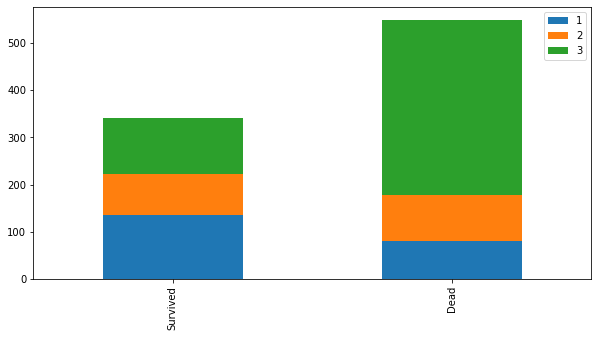

In [14]:
bar('Pclass')

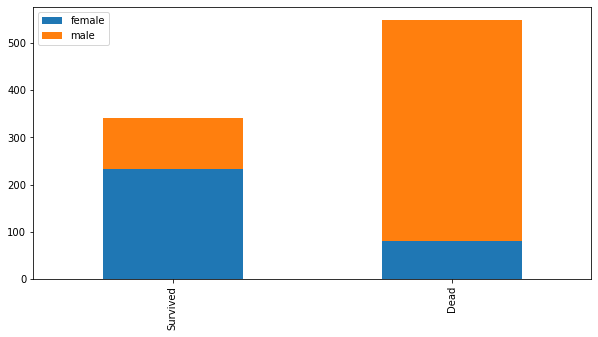

In [15]:
bar('Sex')

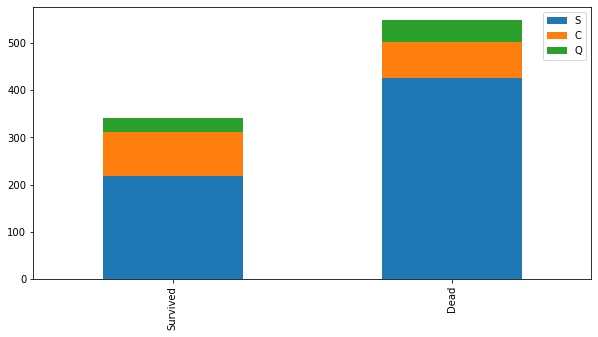

In [16]:
bar('Embarked')

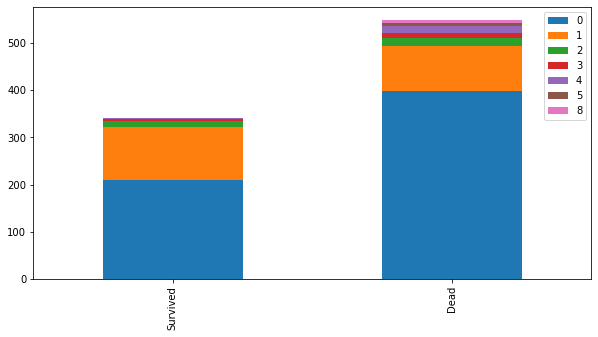

In [17]:
bar('SibSp')

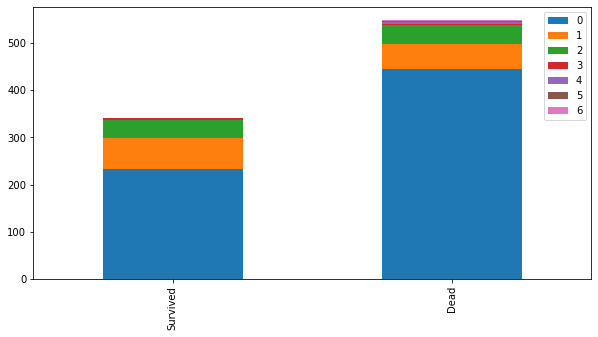

In [18]:
bar('Parch')

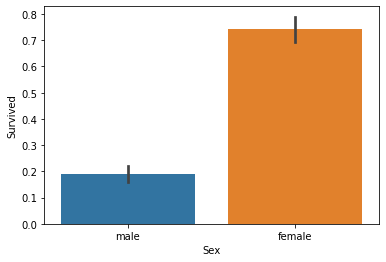

In [19]:
sns.barplot(y='Survived',x='Sex',data=a_train)

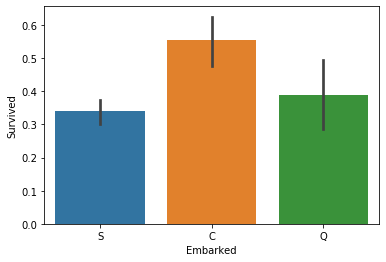

In [20]:
sns.barplot(y='Survived',x='Embarked',data=a_train)

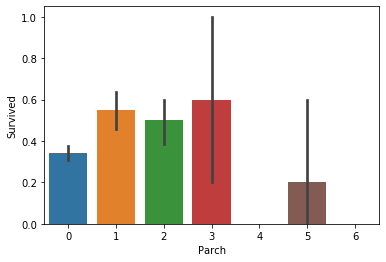

In [21]:
sns.barplot(y='Survived',x='Parch',data=a_train)

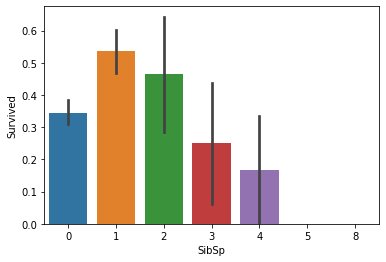

In [22]:
sns.barplot(y='Survived',x='SibSp',data=a_train)

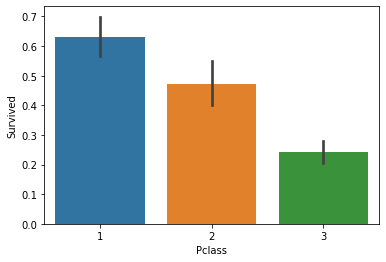

In [23]:
sns.barplot(y='Survived',x='Pclass',data=a_train)

In [24]:
combined_data = pd.concat([a_train,a_test],axis=0)

C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [25]:
combined_data.shape

(1309, 10)

In [26]:
combined_data.isnull().sum()

Age         263
Embarked      0
Fare          1
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
Ticket        0
dtype: int64

In [27]:
combined_data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [28]:
title=[]
for i in combined_data['Name']:
    t=i.split(',')[1].split('.')[0].strip()
    title.append(t)
combined_data['Title'] = title
    

In [29]:
combined_data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Don               1
Lady              1
Capt              1
Sir               1
the Countess      1
Jonkheer          1
Dona              1
Mme               1
Name: Title, dtype: int64

In [30]:
combined_data['Family_Size'] = combined_data['Parch'] + combined_data['SibSp'] + 1

In [31]:
combined_data.Family_Size.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_Size, dtype: int64

In [32]:
combined_data['Singleton'] = combined_data['Family_Size'].map(lambda s : 1 if s==1 else 0)
combined_data['Small_Family'] = combined_data['Family_Size'].map(lambda s : 1 if s>=2 and s<=4 else 0)
combined_data['Large_Family'] = combined_data['Family_Size'].map(lambda s : 1 if s>4 else 0)


In [33]:
combined_data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,Singleton,Small_Family,Large_Family
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr,2,0,1,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs,2,0,1,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,0,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs,2,0,1,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr,1,1,0,0


In [34]:
combined_data['Fare_Greater_Than_50'] = combined_data['Fare'].map(lambda s : 1 if s>50 else 0)

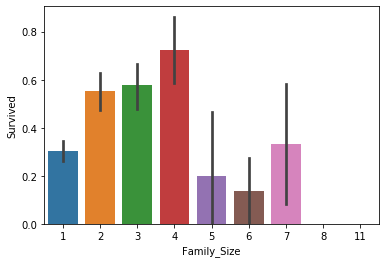

In [35]:
sns.barplot(y='Survived',x='Family_Size',data=combined_data)

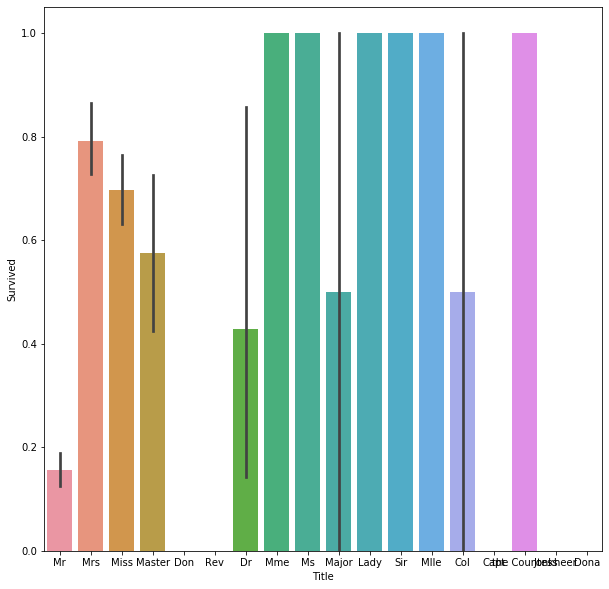

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(y='Survived',x='Title',data=combined_data)

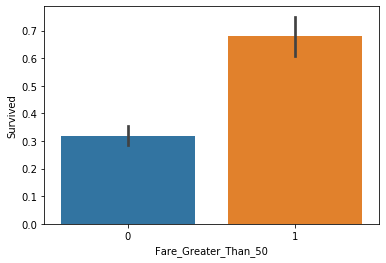

In [37]:
sns.barplot(y='Survived',x='Fare_Greater_Than_50',data=combined_data)

In [38]:
combined_data.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'Title', 'Family_Size', 'Singleton',
       'Small_Family', 'Large_Family', 'Fare_Greater_Than_50'],
      dtype='object')

In [39]:
combined_data.drop(['Fare','Name','Ticket','Family_Size','Survived'],inplace=True,axis=1)

In [40]:
combined_data.describe()

,Age,Parch,Pclass,SibSp,Singleton,Small_Family,Large_Family,Fare_Greater_Than_50
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,0.385027,2.294882,0.498854,0.603514,0.333843,0.062643,0.183346
std,14.413493,0.865560,0.837836,1.041658,0.489354,0.471765,0.242413,0.387098
min,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,39.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,80.000000,9.000000,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
combined_data.isnull().sum()

Age                     263
Embarked                  0
Parch                     0
Pclass                    0
Sex                       0
SibSp                     0
Title                     0
Singleton                 0
Small_Family              0
Large_Family              0
Fare_Greater_Than_50      0
dtype: int64

In [42]:
combined_data['Age'] = combined_data['Age'].fillna(combined_data['Age'].mean())

In [43]:
combined_data.isnull().sum()

Age                     0
Embarked                0
Parch                   0
Pclass                  0
Sex                     0
SibSp                   0
Title                   0
Singleton               0
Small_Family            0
Large_Family            0
Fare_Greater_Than_50    0
dtype: int64

In [44]:
categorical_data = combined_data.select_dtypes(include=object).columns

In [45]:
categorical_data

Index(['Embarked', 'Sex', 'Title'], dtype='object')

In [46]:
for i in categorical_data:
    dummies = pd.get_dummies(combined_data[i],prefix=i)
    combined_data = pd.concat([combined_data,dummies],axis=1)
    combined_data.drop(i,axis=1,inplace=True)


In [47]:
combined_data.head()

,Age,Parch,Pclass,SibSp,Singleton,Small_Family,Large_Family,Fare_Greater_Than_50,Embarked_C,Embarked_Q,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,0,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,0,1,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
combined_data['Child'] = combined_data['Age'].map(lambda s : 1 if 0<s<=12 else 0)
combined_data['Teenager'] = combined_data['Age'].map(lambda s : 1 if 12<s<18 else 0)
combined_data['Youth'] = combined_data['Age'].map(lambda s : 1 if 18<s<35 else 0)
combined_data['Man'] = combined_data['Age'].map(lambda s : 1 if 35<=s<=60 else 0)
combined_data['Old'] = combined_data['Age'].map(lambda s : 1 if s>60 else 0)


In [49]:
combined_data.head()

,Age,Parch,Pclass,SibSp,Singleton,Small_Family,Large_Family,Fare_Greater_Than_50,Embarked_C,Embarked_Q,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Child,Teenager,Youth,Man,Old
0,22.0,0,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,0,1,1,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
2,26.0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35.0,0,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,35.0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
combined_data.drop(['Age'],inplace=True,axis=1)

In [51]:
combined_data.head(10)

,Parch,Pclass,SibSp,Singleton,Small_Family,Large_Family,Fare_Greater_Than_50,Embarked_C,Embarked_Q,Embarked_S,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Child,Teenager,Youth,Man,Old
0,0,3,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,3,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,3,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,0,3,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,1,3,3,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,2,3,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9,0,2,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [52]:
train_data = combined_data.iloc[:891]
test_data = combined_data.iloc[891:]

In [53]:
train_data.shape

(891, 35)

In [54]:
test_data.shape

(418, 35)

In [55]:
x_train = train_data.to_numpy()

In [56]:
x_test = test_data.to_numpy()

In [57]:
y_train = train['Survived'].to_numpy()

In [58]:
y_train.shape

(891,)

In [59]:
x_train.shape

(891, 35)

In [60]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
clf.fit(x_train,y_train)
y_pred_rf = clf.predict(x_test)

In [61]:
PId = test['PassengerId']
data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred_rf})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)

In [62]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2 , bootstrap = True, random_state=42)
clf.fit(x_train,y_train)
y_pred_rf = clf.predict(x_test)

In [63]:
PId = test['PassengerId']
data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred_rf})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)

In [64]:
svc = SVC(C=100, gamma=0.01)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [65]:
PId = test['PassengerId']
data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)

In [66]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [67]:
PId = test['PassengerId']
data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)

In [68]:
param_grid ={'C':[1,10,100,200],'gamma':[0.001,0.01,0.1],'kernel':['rbf','poly']}
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=3)
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [69]:
PId = test['PassengerId']
data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)

In [70]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [71]:
y_pred = grid.predict(x_test)
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [72]:
PId = test['PassengerId']
data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)

In [75]:
param_grid = {'n_estimators':[50,100,200,500],
              'max_depth' : [3,5,7,9,13,15,19],
              'min_samples_leaf' : [2,3,5],
              'max_features' : ['auto','log2']}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=45),param_grid=param_grid,cv=3)
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)

data = pd.DataFrame({'PassengerId': PId, 'Survived': y_pred})
data.to_csv('Kaggle_Data/Titanic/s1.csv',index=False)
